In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('../data/sales.csv')
df = pd.read_csv('sales.csv')

In [3]:
df.dropna(subset=['price'], inplace=True)

In [4]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [5]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year

train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]

# 1. Data Transformation

<font color='red'>Assignment:</font> Build a transformer class to extract numerical features (**cost**, **weight**, **height**, **width**, and **depth**) and replace the missing values with the averages in train_raw.

In [6]:
'''Transformer class to extract numerical features'''

class Transformer():
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df["cost"] = X["cost"].map(self.cost2num)
        df["weight"] = X["weight"].map(self.weight2num)
        df["height"] = X["height"].map(self.dim2num)
        df["width"] = X["width"].map(self.dim2num)
        df["depth"] = X["depth"].map(self.dim2num)
        self.mean = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df["cost"] = X["cost"].map(self.cost2num)
        df["weight"] = X["weight"].map(self.weight2num)
        df["height"] = X["height"].map(self.dim2num)
        df["width"] = X["width"].map(self.dim2num)
        df["depth"] = X["depth"].map(self.dim2num)
        return df.fillna(self.mean)
        
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)
    
    def cost2num(self, x):
        if isinstance(x, str):
            x = x.strip("$").strip("k")
        return float(x) * 1000
    
    def weight2num(self, x):
        if isinstance(x, str):
            x = x.strip(" Kg").replace(" Ton ", " ").split()
            return float(x[0]) * 1000 + float(x[1])
        return float(x)
    
    def dim2num(self, x):
        if isinstance(x, str):
            x = x.strip(" meters").strip(" cm")
        return float(x)
    

<font color='red'>Assignment:</font> Wrap up the numerical transformer and MinMaxScaler as a pipeline for data transformation.  
**Note:** we don't need linear regression at this time.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

steps = [("ctf", Transformer()), 
         ("rescale", MinMaxScaler())]

model = Pipeline(steps)

<font color='red'>Assignment:</font> Transform **train_raw** and assign the output to a variable **X_train**.

In [8]:
'''Assign X_train'''

X_train = model.fit_transform(train_raw)
X_train

array([[0.35031847, 0.30872483, 0.58888889, 0.30434783, 0.33333333],
       [0.17323162, 0.26845638, 0.53888889, 0.32608696, 0.33333333],
       [0.28343949, 0.27516779, 0.72222222, 0.2173913 , 0.16666667],
       ...,
       [0.17323162, 0.13422819, 0.25      , 0.5       , 0.5       ],
       [0.04352442, 0.2147651 , 0.45555556, 0.36956522, 0.33333333],
       [0.13269639, 0.23489933, 0.7       , 0.19565217, 0.16666667]])

**Example:** import PCA from sklearn.

In [9]:
from sklearn.decomposition import PCA

<font color='red'>Question:</font> What is PCA?

**ANS:**
<br>PCA is a statistical procedure that uses an orthogonal transfomration which converts a set of correlated variabals to a set of uncorrelated variables.

<font color='red'>Assignment:</font> Transform **X_train** using **PCA**. Assign the output to a variable **X_train_pca**.

In [10]:
'''Perform PCA on X_train'''

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_train_pca


array([[-0.07753272,  0.13375021,  0.1241135 ,  0.03158385, -0.01474293],
       [-0.04446052, -0.01610647,  0.01391936,  0.01654666, -0.00889212],
       [-0.30553848,  0.08810955,  0.08349599, -0.01402625,  0.01552426],
       ...,
       [ 0.30699703, -0.17310172,  0.11872353,  0.02157023,  0.00895305],
       [ 0.02121666, -0.1560476 , -0.04567689, -0.01470167,  0.00189363],
       [-0.31249657, -0.04096333, -0.00775299, -0.00542039,  0.0012839 ]])

# 2. Variance

<font color='red'>Assignment:</font> Plot **explained_variance_ratio_** in a bar chart.

<BarContainer object of 5 artists>

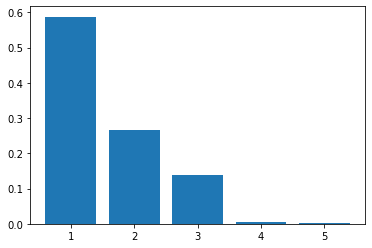

In [11]:
import matplotlib.pylab as plt
%matplotlib inline

x = [i for i in range(1, pca.n_components_ + 1)]
y = pca.explained_variance_ratio_
plt.bar(x, y)

##### <font color='red'>Question:</font> why the following result?

<font color='red'>Question:</font> How principal components are ranked?

**ANS:**
<br>Principle components are ranked by their singular value or explained variance from high to low.

<font color='red'>Question:</font> What percentage of variance is kept in the first principle component?

**ANS:**
<br>58.77%

<font color='red'>Question:</font> How do the original features contribute to the first principle component?

In [12]:
pc1 = pca.components_[0]
features = ["cost", "weight", "height", "width", "depth"]
print("Feature contribution to the first principle component")
for idx in range(len(pc1)):
    print("{0}: {1:.2f}".format(features[idx], pc1[idx]))

Feature contribution to the first principle component
cost: 0.03
weight: 0.11
height: -0.63
width: 0.54
depth: 0.55


##### <font color = 'blue'> Is there some mistakes here? Weight is supposed to contribute more than the dimensions... </font>

<font color='red'>Question:</font> What is the relationship between the principal components and original features? Is PCA a linear function?

**ANS:**
<br>Each priciple component is a linear combination of the original features.

<font color='red'>Assignment:</font> Plot the Variance versus the number of chosen principle components.

<BarContainer object of 5 artists>

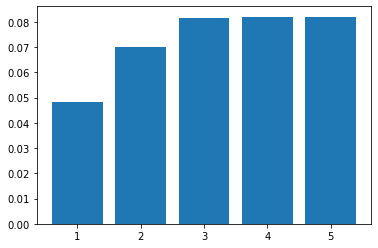

In [13]:
variance = pca.explained_variance_
num = [i+1 for i in range(len(variance))]
y = [sum(variance[:i+1]) for i in range(len(variance))]
plt.bar(num, y)

<font color='red'>Question:</font> How many principle components would you like to keep?

**ANS:**
<br>3 principle components

bold text##### <font color='red'>Elbow method</font>

# 3. PCA Pipeline

<font color='red'>Assignment:</font> Build a pipeline to wrap up **Numerical Transformer**, **MinMaxScaler**, **PCA**, and **LinearRegression** to predict **price**. Find the best **n_components** for **PCA**.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

features = list(train_raw.columns)
target = "price"
features.remove(target)

def price2num(x):
    if isinstance(x, str):
        x = x.strip("$").replace(",", "")
    return float(x)

X_train = train_raw[features]
y_train = train_raw[target].map(price2num)

X_test = test_raw[features]
y_test = test_raw[target].map(price2num)

steps = [("ctf", Transformer()), 
         ("scaler", MinMaxScaler()), 
         ("pca", PCA()),
         ("lr", LinearRegression())]

model = Pipeline(steps)
model = model.fit(X_train, y_train)

params = {"pca__n_components": range(1, 6)}
scorer = make_scorer(mean_squared_error, greater_is_better=False)

clf = GridSearchCV(model, params, scoring=scorer)
clf.fit(X_train, y_train)
clf.best_params_

{'pca__n_components': 3}

In [ ]:
steps = [("ctf", Transformer()), 
         ("scaler", MinMaxScaler()), 
         ("pca", PCA(n_components=3)),
         ("lr", LinearRegression())]

model = Pipeline(steps)
model = model.fit(X_train, y_train)

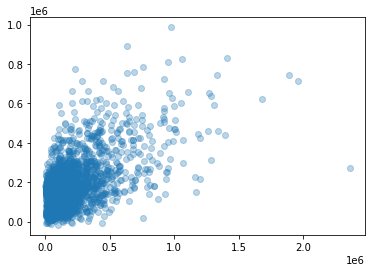

In [ ]:
'''Train'''

y_train_pred = model.predict(X_train)
plt.scatter(y_train, y_train_pred, alpha=0.3)

In [ ]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.14e+05
train MSE: 2.87e+10
train R2: 0.326


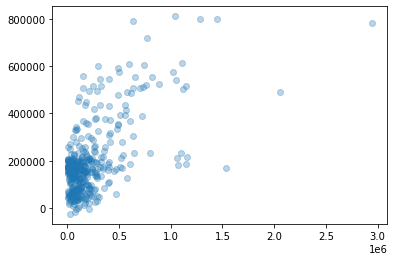

In [ ]:
'''Test'''

y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred, alpha=0.3)

In [ ]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.43e+05
test MSE: 5.58e+10
test R2: 0.352


<font color='red'>Question:</font> What is the difference between PCA and SVD?

**ANS:**
<br>PCA first calculates the covariance matrix and then do eigen-decomposition, while SVD directly do singular value decomposition of the centered data matrix.
<br>PCA is faster but less accurate, while SVD is slower but mathematically more precise.

##### <font color='red'>Question:</font> why in some cases the model performance drops after picking top PCs?